<a href="https://colab.research.google.com/github/leandra-mara/MVP--Analise-de-Dados-e-Boas-Praticas/blob/main/Leandra_Mara_MVP_Sprint_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Leandra Mara da Silva

**Dataset:** [Transações Bancárias Dataset](https://raw.githubusercontent.com/leandra-mara/MVP--Analise-de-Dados-e-Boas-Praticas/refs/heads/main/NU_01JAN2025_30JUN2025_aberto_transacoes_2025.csv)



# Descrição do Problema

O objetivo deste trabalho é analisar dados de transações financeiras de uma persona que chamaremos de Alessandra Dias.

Alessandra deseja ter maior controle de seus gastos e forneceu extratos que contemplam as transações dos dois primeiros quarters de 2025 (6 meses) no banco que ela centraliza as saídas bancárias. Suas saídas financeiras incluem despesas, migrações para outras contas e investimentos em renda fixa.

Ela tem um perfil frugal, sem exageros e tinha estabelecido em seus OKRs de 2025:
* ter um gasto máximo mensal de 10K, tendo como baseline o valor médio mensal de 13K em 2024
* reduzir os gastos mensais no cartão de crédito para o valor máximo de 2K, tendo como baseline o valor médio mensal de 5K em 2024.

As análises visam extrair insights sobre os padrões de comportamento financeiro ao longo desse início de ano, como: em que tipo de operações ocorrem suas maiores saídas, necessidade de maior orçamento na primeira quinzena de cada mês, crescimento de transações de saída por PIx, dentro outras análises.

Em trabalhos futuros, visa-se experimentar categorizações de gastos, de forma a conseguir sugerir possibilidades de redução de despesas em categorias de gastos considerados como não essenciais.

## Hipóteses

As hipóteses que auxiliam o entendimento do comportamento de gastos da persona e que estarão contemplados nesta primeira etapa de Análise Exploratória são:

**1. Gastos mensais**
- Os gastos em 2025 estão abaixo da média mensal de 2024, que foi de 13k.


**2. Distribuição dos Gastos por Tipo de Operação:**
- A maior parte das transações de saída é feita por Pix.


**3. Comportamento por Quinzena:**
- A maior parte das saídas ocorre na primeira quinzena de cada mês.


**4. Operações Pix: PF vs PJ:**
- A maioria das operações Pix são direcionadas a pessoas físicas.

**5. Frequência por Dia da Semana:**
- Dias úteis concentram a maioria das transações financeiras.

## Tipo de Problema

Este é um problema de análise exploratória de dados com foco em identificação de padrões de comportamento financeiro pessoal. Não se trata de um problema de predição ou classificação supervisionada.

No futuro, possivelmente o declararemos como problema de classificação supervisionada (para a próxima disciplina), separando um conjunto de gastos que poderemos categorizar manualmente (saúde, alimentação, etc), mas aqui o foco será na análise exploratória e pré-processamento dos dados financeiros.

## Seleção de Dados

O dataset utilizado é um extrato exportado de app de banco digital contendo quase 400 transações listadas por dia, mês e ano. O arquivo contem as seguintes colunas:

- ***Data:*** data da transação no formato XXX/XX/XXX
- ***Valor:*** valor da transação podendo ser positiva ou negativa. Ex.: -35.60 ou 35.60
- ***Identificador:*** código do banco para a transação
- ***Descrição:*** detalhamento da transação com várias informações na mesma coluna, podendo ter como informação obrigatória: o tipo da transação; e como informações opcionais integradas: nome do beneficiário, dados do beneficiário (cpf ou cnpj), informações da conta de destino.

Dados sensíveis (CPF e contas bancárias) estão devidamente mascarados.

## Atributos após Pré-Processamento - Modelo das Análises

1. ***data:*** Data da transação (objeto transformado para datetime)

2. ***valor:*** Valor da transação (valores negativos indicam saídas)

3. ***tipo_operacao:*** Categoria da operação (extraída via split da coluna Descrição)

4. ***beneficiario:*** Nome do favorecido, quando aplicável (extraída via split da coluna Descrição). Não estaria disponível em operações de pagamentos de fatura de cartão de crédito, nem em operações de investimentos. Nestes casos de nulo, foram preenchidos como "nao_se_aplica".

5. ***pix_destino:*** Nas transações de pix, contem o CPF ou CNPJ de destino. Nas demais transações consta como "nao_se_aplica".

6. ***classificacao:*** Classificação da saída (investimento, migração entre contas, despesa). Infomação sempre presente e extraído a partir da seguinte lógica: (i) investimento: quando a contem as palavras chave de investimento (CDB, LCI, LCA e RDB), (ii)migração entre contas: quando na descrição do beneficiário há o nome da persona, (iii) despesas: as demais saídas.

7. ***pix_tipo:*** Indica se a transação Pix foi para pessoa física (pf) ou jurídica (pj). Nas demais transações, preenchido que "nao_se_aplica".


Variáveis derivadas para análise temporal, permitindo análises de consumo por quinzena, aglutinação dos dados por mês/ano e de padrões de consumo em dias específicos da semana (ou de finais de semana).

8. ***dia_da_semana:*** extraído de data
9. ***mes:*** extraído de data  
10. ***ano:*** extraído de data  
11. ***quinzena***

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [9]:
import pandas as pd
import unicodedata
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import calendar

In [10]:
# carregamento do dataset e armazenamento em um dataframe
url = "https://raw.githubusercontent.com/leandra-mara/MVP--Analise-de-Dados-e-Boas-Praticas/refs/heads/main/NU_01JAN2025_30JUN2025_aberto_transacoes_2025.csv"
extrato2025 = pd.read_csv(url)

In [11]:
# primeiras linhas
extrato2025.head()

,Data,Valor,Identificador,Descrição
0,01/01/2025,-186.58,67759f90-ade1-43a5-87b7-60d6294701cc,Transferência enviada pelo Pix - AMAZON.COM.BR...
1,02/01/2025,-466.50,67768da2-080a-46d7-a53a-0e00edb4b1dc,Compra no débito - Supermercados Mundia
2,03/01/2025,-4.99,6777b829-26b5-4d20-bedc-0a781b7b3a22,Compra no débito - Padaria e Confeitaria
3,03/01/2025,-39.60,6777bd03-ad0f-491e-b2b4-f9902450f3fe,Compra no débito - Sacolao Volante
4,03/01/2025,-38.00,6777f778-59f2-4f77-a2c0-ff348d0b4405,Compra no débito - Sacolao Volante


Listamos as informações gerais do dado abaixo e confirmamos que não há dados faltantes no dado original. Quando fizermos as transformações geraremos campos nulos e explicaremos os devidos tratamentos. Segue os dados gerais.

In [12]:
# dados gerais
print(f"Total de instâncias: {len(extrato2025)}")
print("\nTipos de dados por coluna:")
print(extrato2025.info())

Total de instâncias: 395

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           395 non-null    object 
 1   Valor          395 non-null    float64
 2   Identificador  395 non-null    object 
 3   Descrição      395 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.5+ KB
None


In [45]:
# quantidade de dados positivos e de dados negativos

# Contar valores negativos
qtd_negativos = (extrato2025["valor"] < 0).sum()

# Contar valores positivos
qtd_positivos = (extrato2025["valor"] > 0).sum()

print(f"Quantidade de valores negativos (saidas): {qtd_negativos}")
print(f"Quantidade de valores positivos (entradas): {qtd_positivos}")

Quantidade de valores negativos (saidas): 377
Quantidade de valores positivos (entradas): 18


# Transformações e Etapas de Pré-Processamento dos dados

Note que, assim como explicado na seção "Seleção de Dados", a coluna Descrição do dado original armazena diferentes informações aglutinadas e separadas por " - ".

Para viabilizar a análise das informações e do dado, alteraremos os dados brutos em um formato mais compreensível e utilizável no contexto deste estudo.

## Padronização de nomes de colunas



In [13]:
def normalizar_nomes_colunas(df: pd.DataFrame) -> pd.DataFrame:
    """
    Normaliza nomes das colunas:
    - Converte para minúsculas
    - Remove acentos
    - Substitui 'ç' por 'c'
    - Substitui espaços por '_'
    """
    df = df.copy()

    def limpar_nome(col):
        # Remove acentos e normaliza
        col = unicodedata.normalize("NFKD", col).encode("ASCII", "ignore").decode("utf-8")
        col = col.replace("ç", "c")  # substitui cedilha manualmente se ainda presente
        col = col.lower().strip().replace(" ", "_")
        return col

    df.columns = [limpar_nome(col) for col in df.columns]
    return df

In [14]:
extrato2025 = normalizar_nomes_colunas(extrato2025)
extrato2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           395 non-null    object 
 1   valor          395 non-null    float64
 2   identificador  395 non-null    object 
 3   descricao      395 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.5+ KB


## Recuperação das Transações de Saída (valores negativos)

In [15]:
def filtrar_valores_negativos(df: pd.DataFrame, nome_coluna: str = "valor") -> pd.DataFrame:
    """
    Retorna um novo DataFrame apenas com as linhas cujo valor é negativo.
    """
    return df[df[nome_coluna] < 0].copy()

In [16]:
transacoes_de_saida = filtrar_valores_negativos(extrato2025)
transacoes_de_saida.head()

,data,valor,identificador,descricao
0,01/01/2025,-186.58,67759f90-ade1-43a5-87b7-60d6294701cc,Transferência enviada pelo Pix - AMAZON.COM.BR...
1,02/01/2025,-466.50,67768da2-080a-46d7-a53a-0e00edb4b1dc,Compra no débito - Supermercados Mundia
2,03/01/2025,-4.99,6777b829-26b5-4d20-bedc-0a781b7b3a22,Compra no débito - Padaria e Confeitaria
3,03/01/2025,-39.60,6777bd03-ad0f-491e-b2b4-f9902450f3fe,Compra no débito - Sacolao Volante
4,03/01/2025,-38.00,6777f778-59f2-4f77-a2c0-ff348d0b4405,Compra no débito - Sacolao Volante


In [18]:
transacoes_de_saida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 394
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           377 non-null    object 
 1   valor          377 non-null    float64
 2   identificador  377 non-null    object 
 3   descricao      377 non-null    object 
dtypes: float64(1), object(3)
memory usage: 14.7+ KB


## Extrair Informação Temporal

In [23]:
def classificar_quinzena(dia):
    if dia <= 15:
        return "1ª quinzena"
    else:
        return "2ª quinzena"

In [24]:
def extrair_info_temporal(df: pd.DataFrame, coluna_data: str = "data") -> pd.DataFrame:
    """
    A partir da coluna de data, extrai:
    - dia_da_semana
    - dia_do_mes
    - mes
    - ano
    - ano_mes
    - quinzena
    E insere tais colunas
    """
    df = df.copy()

    # Converter coluna para datetime (formato brasileiro, dia/mês/ano)
    df[coluna_data] = pd.to_datetime(df[coluna_data], dayfirst=True, errors="coerce")

    # Criar colunas de data em português
    dias_semana = {
        0: "segunda-feira",
        1: "terca-feira",
        2: "quarta-feira",
        3: "quinta-feira",
        4: "sexta-feira",
        5: "scbado",
        6: "domingo"
    }

    meses = {
        1: "janeiro", 2: "fevereiro", 3: "março", 4: "abril",
        5: "maio", 6: "junho", 7: "julho", 8: "agosto",
        9: "setembro", 10: "outubro", 11: "novembro", 12: "dezembro"
    }

    # Remover colunas se já existirem
    for col in ["dia_da_semana", "dia_do_mes", "mes", "ano", "ano_mes","quinzena"]:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

    # Incluir colunas referentes a informações temporais
    df["dia_da_semana"] = df[coluna_data].dt.weekday.map(dias_semana)
    df["dia_do_mes"] = df[coluna_data].dt.day
    df["mes"] = df[coluna_data].dt.month.map(meses)
    df["ano"] = df[coluna_data].dt.year
    df["ano_mes"] = df[coluna_data].dt.to_period("M")

    df["quinzena"] = df["dia_do_mes"].apply(classificar_quinzena)

    return df

In [25]:
transacoes_de_saida = extrair_info_temporal(transacoes_de_saida)
transacoes_de_saida.head()

,data,valor,identificador,descricao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena
0,2025-01-01,-186.58,67759f90-ade1-43a5-87b7-60d6294701cc,Transferência enviada pelo Pix - AMAZON.COM.BR...,quarta-feira,1,janeiro,2025,2025-01,1ª quinzena
1,2025-01-02,-466.50,67768da2-080a-46d7-a53a-0e00edb4b1dc,Compra no débito - Supermercados Mundia,quinta-feira,2,janeiro,2025,2025-01,1ª quinzena
2,2025-01-03,-4.99,6777b829-26b5-4d20-bedc-0a781b7b3a22,Compra no débito - Padaria e Confeitaria,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena
3,2025-01-03,-39.60,6777bd03-ad0f-491e-b2b4-f9902450f3fe,Compra no débito - Sacolao Volante,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena
4,2025-01-03,-38.00,6777f778-59f2-4f77-a2c0-ff348d0b4405,Compra no débito - Sacolao Volante,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena


## Classificar Tipo de Saída

Saídas podem ser: investimento, migração entre contas, pagamento de despesa. Apenas neste último é considerado gasto.

In [28]:
def classificar_saida(df: pd.DataFrame, coluna_descricao: str = "descricao") -> pd.DataFrame:
    df = df.copy()

    condicoes = [
        df[coluna_descricao].str.contains("Alessandra Dias", case=False, na=False),
        df[coluna_descricao].str.contains(r"\b(?:LCA|RDB|LCI|CDB)\b", case=False, na=False)
    ]

    valores = ["migracao_entre_contas", "investimento"]
    valor_default = "pgto_despesa"

    pos_valor = df.columns.get_loc(coluna_descricao) +1

   # Remover coluna se já existir
    for col in ["classificacao"]:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

    # Insere nova coluna
    df.insert(pos_valor, "classificacao", np.select(condicoes, valores, default=valor_default))
    return df

In [29]:
# classificando as saídas para que seja possível analisá-las discriminadamente
transacoes_de_saida = classificar_saida(df=transacoes_de_saida)
transacoes_de_saida.head()

,data,valor,identificador,descricao,classificacao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena
0,2025-01-01,-186.58,67759f90-ade1-43a5-87b7-60d6294701cc,Transferência enviada pelo Pix - AMAZON.COM.BR...,pgto_despesa,quarta-feira,1,janeiro,2025,2025-01,1ª quinzena
1,2025-01-02,-466.50,67768da2-080a-46d7-a53a-0e00edb4b1dc,Compra no débito - Supermercados Mundia,pgto_despesa,quinta-feira,2,janeiro,2025,2025-01,1ª quinzena
2,2025-01-03,-4.99,6777b829-26b5-4d20-bedc-0a781b7b3a22,Compra no débito - Padaria e Confeitaria,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena
3,2025-01-03,-39.60,6777bd03-ad0f-491e-b2b4-f9902450f3fe,Compra no débito - Sacolao Volante,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena
4,2025-01-03,-38.00,6777f778-59f2-4f77-a2c0-ff348d0b4405,Compra no débito - Sacolao Volante,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena


In [30]:
# função que permite filtrar um subconjunto de linhas
def filtrar_linhas_por_valor(df: pd.DataFrame, coluna: str, valor: str) -> pd.DataFrame:
    """
    Retorna as linhas do DataFrame onde o valor da coluna corresponde ao valor informado,
    ignorando espaços extras e diferenças de caixa (maiúsculas/minúsculas).
    """
    filtro = df[coluna].astype(str).str.strip().str.lower() == valor.strip().lower()
    return df[filtro]

In [31]:
# verificando as transações classificadas como investimentos
linhas_investimento = filtrar_linhas_por_valor(transacoes_de_saida, "classificacao", "investimento")
linhas_investimento.head()

,data,valor,identificador,descricao,classificacao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena
40,2025-01-10,-20000.00,67811ee0-06b3-41fc-8344-452d19707445,Compra de CDB - Nubank,investimento,sexta-feira,10,janeiro,2025,2025-01,1ª quinzena
60,2025-01-22,-50000.00,679107ae-d2db-4172-a0cd-20f14671e9e9,Aplicação LCA - Banco Original,investimento,quarta-feira,22,janeiro,2025,2025-01,2ª quinzena
285,2025-05-13,-2022.64,68232387-89f4-4e10-9f73-e085863433d5,Aplicação RDB,investimento,terca-feira,13,maio,2025,2025-05,1ª quinzena
286,2025-05-13,-2977.36,68232b4f-344e-4995-9afd-95f5c85a48f3,Aplicação RDB,investimento,terca-feira,13,maio,2025,2025-05,1ª quinzena


In [32]:
# verificando as transações classificadas como migração entre contas
linhas_migracao_entre_contas = filtrar_linhas_por_valor(transacoes_de_saida, "classificacao", "migracao_entre_contas")
linhas_migracao_entre_contas.head()

,data,valor,identificador,descricao,classificacao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena
61,2025-01-22,-100000.00,67910ad8-8fe2-4740-a2a3-39921747eaab,Transferência enviada pelo Pix - Alessandra Di...,migracao_entre_contas,quarta-feira,22,janeiro,2025,2025-01,2ª quinzena
126,2025-02-25,-40.00,67bdb686-bc45-4391-a99d-c48eeb4059fc,Transferência enviada pelo Pix - Alessandra Di...,migracao_entre_contas,terca-feira,25,fevereiro,2025,2025-02,2ª quinzena
178,2025-03-17,-100242.62,67d824c8-4658-4b8d-99da-ef8663afe96d,Transferência enviada pelo Pix - Alessandra Di...,migracao_entre_contas,segunda-feira,17,março,2025,2025-03,2ª quinzena
188,2025-03-29,-2000.00,67e80f0d-132d-464d-951f-98e5d16a4b1b,Transferência enviada pelo Pix - Alessandra Di...,migracao_entre_contas,scbado,29,março,2025,2025-03,2ª quinzena


## Realizar Split da Descrição

Por meio deste split vamos ter diferentes informações relevantes sobre a transação. Todos os campos criados para o novomodelo estão detalhados no início deste trabalho concentrando a tal documentação naquele ponto.

In [33]:
"""
    Função que separa a coluna 'descricao' em partes, sabendo que ali contem várias informações separados por ' - '.
    Separamos em:
    - tipo_operacao: transferência, etc
    - beneficiario: nome da pessoa ou empresa beneficiária da transação
    - pix_destino: cpf mascarado ou cnpj do beneficiario do pix. Só aparece no caso de pix e é uma restrição do dado de entrada
    - outros_dados: dados irrelevantes para nossas análises.
    """

def separar_descricao_em_campos(df: pd.DataFrame, coluna_descricao: str = "descricao") -> pd.DataFrame:
    df = df.copy()

    # Garante que a coluna seja string
    df[coluna_descricao] = df[coluna_descricao].astype(str)

    # Remove colunas se já existirem
    for col in ["tipo_operacao", "beneficiario", "pix_destino", "outros_dados"]:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

    # # Split da coluna descricao em 3 partes
    descricao_split = df[coluna_descricao].str.split(" - ", n=3, expand=True)

    # Inserção das novas colunas
    pos_descricao = df.columns.get_loc(coluna_descricao)
    df.insert(pos_descricao + 1, "tipo_operacao", descricao_split[0])
    df.insert(pos_descricao + 2, "beneficiario", descricao_split[1])
    df.insert(pos_descricao + 3, "pix_destino", descricao_split[2])
    df["outros_dados"] = descricao_split[3]

    return df

In [34]:
transacoes_de_saida = separar_descricao_em_campos(transacoes_de_saida)
transacoes_de_saida.head()

,data,valor,identificador,descricao,tipo_operacao,beneficiario,pix_destino,classificacao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena,outros_dados
0,2025-01-01,-186.58,67759f90-ade1-43a5-87b7-60d6294701cc,Transferência enviada pelo Pix - AMAZON.COM.BR...,Transferência enviada pelo Pix,AMAZON.COM.BR,26.446.040/0002-04,pgto_despesa,quarta-feira,1,janeiro,2025,2025-01,1ª quinzena,EBANX IP LTDA. (0484) Agência: 2 Conta: 200082...
1,2025-01-02,-466.50,67768da2-080a-46d7-a53a-0e00edb4b1dc,Compra no débito - Supermercados Mundia,Compra no débito,Supermercados Mundia,None,pgto_despesa,quinta-feira,2,janeiro,2025,2025-01,1ª quinzena,None
2,2025-01-03,-4.99,6777b829-26b5-4d20-bedc-0a781b7b3a22,Compra no débito - Padaria e Confeitaria,Compra no débito,Padaria e Confeitaria,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,None
3,2025-01-03,-39.60,6777bd03-ad0f-491e-b2b4-f9902450f3fe,Compra no débito - Sacolao Volante,Compra no débito,Sacolao Volante,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,None
4,2025-01-03,-38.00,6777f778-59f2-4f77-a2c0-ff348d0b4405,Compra no débito - Sacolao Volante,Compra no débito,Sacolao Volante,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,None


## Remoção de colunas desnecessárias

In [36]:
def remover_colunas(df: pd.DataFrame, colunas: list) -> pd.DataFrame:
    """
    Remove do DataFrame as colunas informadas, se existirem.
    Colunas que não existirem serão ignoradas.
    """
    df = df.copy()

    # Filtra apenas as colunas que existem no DataFrame
    colunas_existentes = [col for col in colunas if col in df.columns]

    # Se não houver colunas a remover, apenas retorna
    if not colunas_existentes:
        return df

    return df.drop(columns=colunas_existentes)

In [37]:
# Mesmo que a coluna já tenha sido removida, não dá erro, por conta da função criada
transacoes_de_saida = remover_colunas(transacoes_de_saida, ["identificador", "descricao", "outros_dados"])

transacoes_de_saida.head()

,data,valor,tipo_operacao,beneficiario,pix_destino,classificacao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena
0,2025-01-01,-186.58,Transferência enviada pelo Pix,AMAZON.COM.BR,26.446.040/0002-04,pgto_despesa,quarta-feira,1,janeiro,2025,2025-01,1ª quinzena
1,2025-01-02,-466.50,Compra no débito,Supermercados Mundia,None,pgto_despesa,quinta-feira,2,janeiro,2025,2025-01,1ª quinzena
2,2025-01-03,-4.99,Compra no débito,Padaria e Confeitaria,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena
3,2025-01-03,-39.60,Compra no débito,Sacolao Volante,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena
4,2025-01-03,-38.00,Compra no débito,Sacolao Volante,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena


## Classificação de PIX para PJ pu PF

Criar tal coluna auxilia a interpretar se os pagamentos por pix são feitos a pessoas físicas ou pessoas jurídicas. Essa informação CPF ou CNPJ só fica disponível nos casos de operações pix, sendo uma restrição do dado de entrada.

In [38]:
# para sabermos se a operação de pix es6tá sendo realizada para pessoas físicas ou jurídicas
def classificar_pix(df: pd.DataFrame, coluna_pix_destino: str = "pix_destino") -> pd.DataFrame:
    """
    Classifica a transação Pix como sendo para pessoa física (pf), pessoa jurídica (pj)
    ou 'nao_se_aplica', com base na coluna pix_destino.

    Regras:
    - Contém '/' → 'pj' (CNPJ)
    - Contém '•' → 'pf' (CPF mascarado)
    - Caso contrário → 'nao_se_aplica'
    """

    df = df.copy()

    # Remove a coluna se já existir para evitar erro
    if "tipo_pix" in df.columns:
        df.drop(columns=["tipo_pix"], inplace=True)

    def extrair_tipo(valor):
        if isinstance(valor, str):
            if "/" in valor:
                return "pj"
            elif "•" in valor:
                return "pf"
        return "nao_se_aplica"

    df["tipo_pix"] = df[coluna_pix_destino].apply(extrair_tipo)
    return df



In [39]:
transacoes_de_saida = classificar_pix(transacoes_de_saida)

print(transacoes_de_saida["tipo_pix"].value_counts())

tipo_pix
nao_se_aplica    226
pf                93
pj                58
Name: count, dtype: int64


In [40]:
# visualizando a inclusão dos dados na nova coluna
transacoes_de_saida.head()

,data,valor,tipo_operacao,beneficiario,pix_destino,classificacao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena,tipo_pix
0,2025-01-01,-186.58,Transferência enviada pelo Pix,AMAZON.COM.BR,26.446.040/0002-04,pgto_despesa,quarta-feira,1,janeiro,2025,2025-01,1ª quinzena,pj
1,2025-01-02,-466.50,Compra no débito,Supermercados Mundia,None,pgto_despesa,quinta-feira,2,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica
2,2025-01-03,-4.99,Compra no débito,Padaria e Confeitaria,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica
3,2025-01-03,-39.60,Compra no débito,Sacolao Volante,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica
4,2025-01-03,-38.00,Compra no débito,Sacolao Volante,None,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica


## Tratamento de Valores Nulos

O dataset original não possui valores nulos. No entanto, o modelo gerado gerou nulos, como mostramos a seguir.

In [41]:
transacoes_de_saida.isna().sum()

,0
data,0
valor,0
tipo_operacao,0
beneficiario,9
pix_destino,223
classificacao,0
dia_da_semana,0
dia_do_mes,0
mes,0
ano,0


Os casos de nulo listados acima, dizem respeito a transações em que não faz sentido ter aquele campo. Na coluna beneficiario, onde tem nulo atribuiremos o "não se aplica", pois se trata de transações que não tem. Na coluna pix_destino os nulos dizem respeito a transações que não são do tipo pix.


Em ambos os casos, atribuiremos o valor "não se aplica", sem comprometer as análises.

In [42]:
# tratando nulos
transacoes_de_saida["pix_destino"] = transacoes_de_saida["pix_destino"].fillna("nao_se_aplica")

# tratando nulos
transacoes_de_saida["beneficiario"] = transacoes_de_saida["beneficiario"].fillna("nao_se_aplica")

### Validação após o Tratamento de Nulos

In [43]:
# validando o tratamento de nulos
transacoes_de_saida.isna().sum()

,0
data,0
valor,0
tipo_operacao,0
beneficiario,0
pix_destino,0
classificacao,0
dia_da_semana,0
dia_do_mes,0
mes,0
ano,0


# Análise de Dados

Trabalharemos em um modelo (dataframe) que chamaremos de gastos_reais, desconsiderando as saídas com investimentos e migração entre contas. Ou seja, pegaremos as transações classificadas como "pgto_despesas".

In [46]:
# Pegando dados de gastos reais
gastos_reais = transacoes_de_saida[
    transacoes_de_saida["classificacao"].astype(str).str.strip().str.lower() == "pgto_despesa"
].copy()

# Apresentando-os com o valor absoluto
gastos_reais["valor"] = gastos_reais["valor"].abs()

,data,valor,tipo_operacao,beneficiario,pix_destino,classificacao,dia_da_semana,dia_do_mes,mes,ano,ano_mes,quinzena,tipo_pix
0,2025-01-01,186.58,Transferência enviada pelo Pix,AMAZON.COM.BR,26.446.040/0002-04,pgto_despesa,quarta-feira,1,janeiro,2025,2025-01,1ª quinzena,pj
1,2025-01-02,466.50,Compra no débito,Supermercados Mundia,nao_se_aplica,pgto_despesa,quinta-feira,2,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica
2,2025-01-03,4.99,Compra no débito,Padaria e Confeitaria,nao_se_aplica,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica
3,2025-01-03,39.60,Compra no débito,Sacolao Volante,nao_se_aplica,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica
4,2025-01-03,38.00,Compra no débito,Sacolao Volante,nao_se_aplica,pgto_despesa,sexta-feira,3,janeiro,2025,2025-01,1ª quinzena,nao_se_aplica


In [47]:
# Formatar como moeda
gastos_reais["valor_formatado"] = gastos_reais["valor"].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

In [48]:
#agrupar mensalmente
gastos_reais["data"] = pd.to_datetime(gastos_reais["data"], errors="coerce", dayfirst=True)
gastos_reais["ano_mes"] = gastos_reais["data"].dt.to_period("M")

evolucao_despesas = (
    gastos_reais
    .groupby("ano_mes")["valor"]
    .sum()
    .reset_index()
    .rename(columns={"valor": "gasto_total"})
    .sort_values("ano_mes")
)

## H1) Gastos Mensais

### Gráfico de Linhas ou line Plot

Com o gráfico a seguir, mostramos a evolução mês a mês dos gastos (desconsiderando investimentos e migração entre contas).

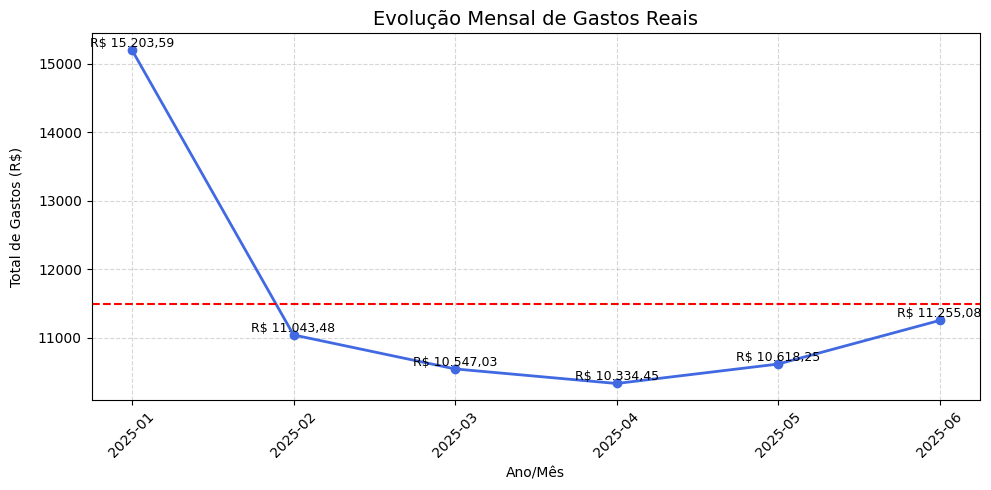

In [51]:
# Garante que ano_mes esteja em string para o eixo x
evolucao_despesas["ano_mes"] = evolucao_despesas["ano_mes"].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(
    evolucao_despesas["ano_mes"],
    evolucao_despesas["gasto_total"],
    marker="o",
    linestyle="-",
    color="royalblue",
    linewidth=2
)

plt.title("Evolução Mensal de Gastos Reais", fontsize=14)
plt.xlabel("Ano/Mês")
plt.ylabel("Total de Gastos (R$)", labelpad=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Exibe os valores em cada ponto do gráfico (opcional)
for i, valor in enumerate(evolucao_despesas["gasto_total"]):
    plt.text(
        evolucao_despesas["ano_mes"][i],
        valor + 50,  # deslocamento para cima
        f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
        ha="center",
        fontsize=9
    )

media_gastos = evolucao_despesas["gasto_total"].mean()
plt.axhline(y=media_gastos, color='red', linestyle='--', linewidth=1.5, label=f"Média: R$ {media_gastos:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

plt.show()

A persona tem como um dos seus objetivos ter gastos mensais em 2025 inferiores a 13K que foi a média de gasto mensal em 2024. Neste caso, conseguimos verificar um esforço para reduzir as despesas que, em todos os meses, ficaram abaixo da média do ano anterior, conforme era desejado. O tracejado mostra que a média neste ano se encontra entre 11k e 12k. Segue o valor exato abaixo de R$ 11.500,31, como média deste ano.

A média de gasto mensal em 2025 fica em:

In [52]:
media_gastos = evolucao_despesas["gasto_total"].mean()
print(f"R$ {media_gastos:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

R$ 11.500,31


A hipótes 1 de redução de despesas passando a ter um consumo mensal abaixo da média do ano anterior foi devidamente validada.

## H2) Distribuição de Gastos por Tipo de Operação

### Gráfico de Linha Múltiplo

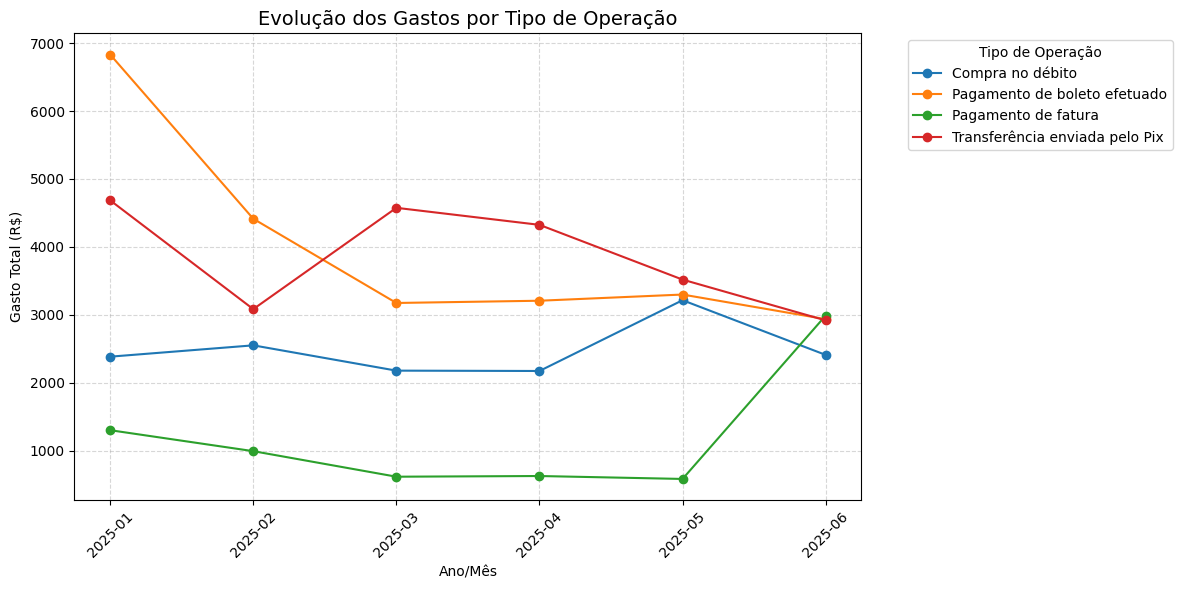

In [60]:
plt.figure(figsize=(12, 6))

for tipo in gastos_por_tipo.columns:
    plt.plot(
        gastos_por_tipo.index,
        gastos_por_tipo[tipo],
        marker="o",
        label=tipo
    )

plt.title("Evolução dos Gastos por Tipo de Operação", fontsize=14)
plt.xlabel("Ano/Mês")
plt.ylabel("Gasto Total (R$)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Tipo de Operação", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Conseguimos identificar tipos de operações que dominam em volume de gastos são:
* ***janeiro/2025:*** pagamento de boleto (linha laranja)
* ***fevereiro/2025:*** pagamento de boleto (linha laranja)
* ***março/2025:*** transferencia por pix (linha vermelha)
* ***abril/2025:*** transferencia por pix (linha vermelha)
* ***maio/2025:*** transferencia por pix (linha vermelha)
* ***junho/2025:*** pagamento de fatura de cartão de crédito (linha verde)

O volume de gastos mensais por pix liderou por 3 meses (março, abril e maio), no entanto em volume total de gastos neste primeiro semestre o pagamento de boleto ganha conforme o total apresentado abaixo.

Apresentaremos outros gráficos de exibição mensal apenas para treinar o uso da biblioteca gráfica. H2 não foi validada.

In [78]:
gastos_por_operacao_sum = gastos_reais.groupby("tipo_operacao")["valor"].sum().reset_index()
gastos_por_operacao_sum = gastos_por_operacao_sum.sort_values(by="valor", ascending=False)
print(gastos_por_operacao_sum)

                    tipo_operacao     valor
1    Pagamento de boleto efetuado  23864.16
3  Transferência enviada pelo Pix  23107.27
0                Compra no débito  14914.73
2             Pagamento de fatura   7115.72


### Gráfico de barras agrupadas (clustered bar chart)

Mostraremos uma barra para cada tipo de operação em cada mês — lado a lado, permitindo comparação entre categorias e ao longo do tempo

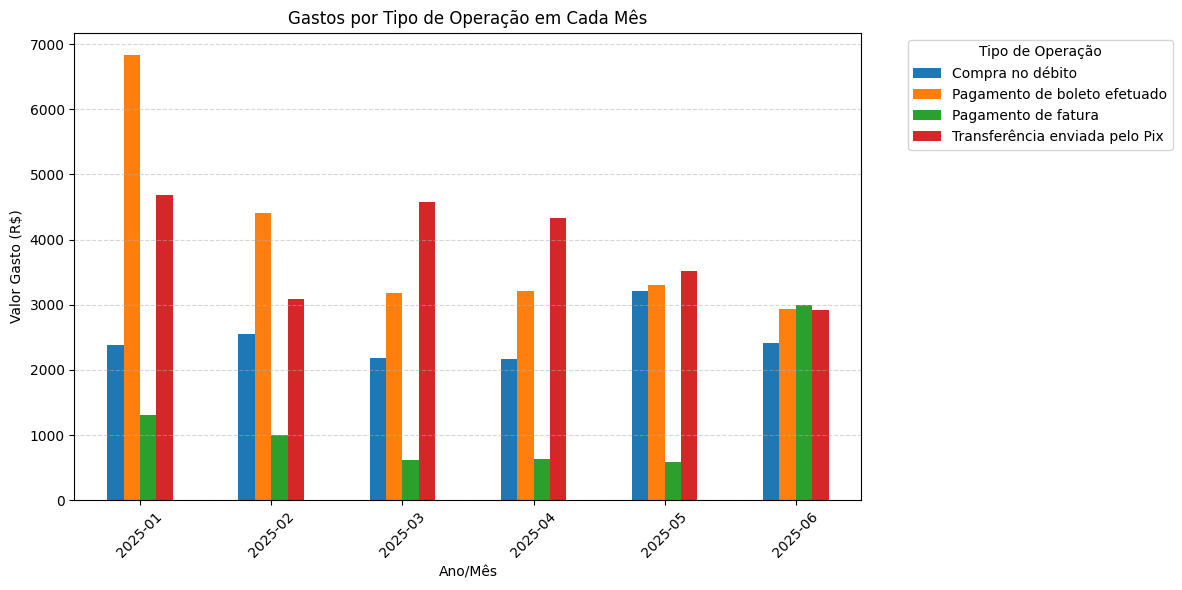

In [58]:
# Garante formato adequado
df_barras = gastos_reais.groupby(["ano_mes", "tipo_operacao"])["valor"].sum().reset_index()

# Pivot para formar tabela mês vs tipo_operacao
df_barras_pivot = df_barras.pivot(index="ano_mes", columns="tipo_operacao", values="valor").fillna(0)
df_barras_pivot.index = df_barras_pivot.index.astype(str)

# Gráfico de barras agrupadas
df_barras_pivot.plot(kind="bar", figsize=(12, 6))

plt.title("Gastos por Tipo de Operação em Cada Mês")
plt.xlabel("Ano/Mês")
plt.ylabel("Valor Gasto (R$)")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Operação", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Gráfico de Calor (heatmap)

Tentaremos resumir visualmente quais tipos de operação tiveram mais gasto em cada mês, utilizando o seaborn

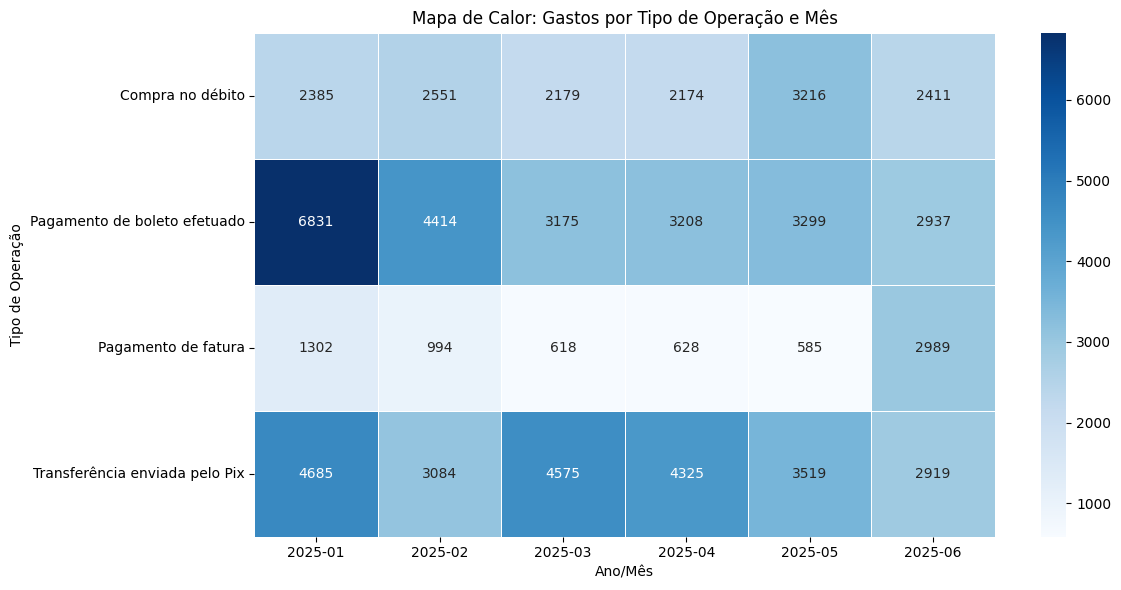

In [59]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(
    df_barras_pivot.T,  # transpõe para ter tipos nas linhas
    cmap="Blues",
    annot=True,
    fmt=".0f",
    linewidths=0.5
)

plt.title("Mapa de Calor: Gastos por Tipo de Operação e Mês")
plt.xlabel("Ano/Mês")
plt.ylabel("Tipo de Operação")
plt.tight_layout()
plt.show()

In [67]:
#gastos_reais["ano_mes"] = gastos_reais["data"].dt.to_period("M")

# Agrupa por ano/mes e tipo de operação
resumo = gastos_reais.groupby(["ano_mes", "tipo_operacao"]).agg(
    quantidade=("valor", "count"),
    total=("valor", "sum"),
    media=("valor", "mean")
).reset_index()

# Ordena por ano_mes e total (em ordem decrescente do gasto dentro de cada mês)
resumo_ordenado_por_volume = resumo.sort_values(by=["ano_mes", "total"], ascending=[True, False])

# Exibe os dados
print(resumo_ordenado_por_volume)

    ano_mes                   tipo_operacao  quantidade    total        media
1   2025-01    Pagamento de boleto efetuado          10  6831.38   683.138000
3   2025-01  Transferência enviada pelo Pix          23  4685.38   203.712174
0   2025-01                Compra no débito          33  2384.52    72.258182
2   2025-01             Pagamento de fatura           1  1302.31  1302.310000
5   2025-02    Pagamento de boleto efetuado           8  4414.42   551.802500
7   2025-02  Transferência enviada pelo Pix          20  3084.09   154.204500
4   2025-02                Compra no débito          23  2551.28   110.925217
6   2025-02             Pagamento de fatura           1   993.69   993.690000
11  2025-03  Transferência enviada pelo Pix          23  4575.49   198.934348
9   2025-03    Pagamento de boleto efetuado           6  3174.89   529.148333
8   2025-03                Compra no débito          25  2178.91    87.156400
10  2025-03             Pagamento de fatura           1   617.74

In [68]:
resumo_ordenado_por_transacoes = resumo.sort_values(by=["ano_mes", "quantidade"], ascending=[True, False])
print(resumo_ordenado_por_transacoes)


    ano_mes                   tipo_operacao  quantidade    total        media
0   2025-01                Compra no débito          33  2384.52    72.258182
3   2025-01  Transferência enviada pelo Pix          23  4685.38   203.712174
1   2025-01    Pagamento de boleto efetuado          10  6831.38   683.138000
2   2025-01             Pagamento de fatura           1  1302.31  1302.310000
4   2025-02                Compra no débito          23  2551.28   110.925217
7   2025-02  Transferência enviada pelo Pix          20  3084.09   154.204500
5   2025-02    Pagamento de boleto efetuado           8  4414.42   551.802500
6   2025-02             Pagamento de fatura           1   993.69   993.690000
8   2025-03                Compra no débito          25  2178.91    87.156400
11  2025-03  Transferência enviada pelo Pix          23  4575.49   198.934348
9   2025-03    Pagamento de boleto efetuado           6  3174.89   529.148333
10  2025-03             Pagamento de fatura           1   617.74

## Gasto por Quinzena

**Principais insights:**

* A maior parte das saídas acontece na primeira quinzena do mês.

* O gráfico de barras mostrou essa diferença com os valores dos gastos sobre as barras em cada mês.

Como é apresentado no cálculo a seguir, na média:
* a 1ª quinzena responde por 77.12% dos gastos mensais
* a 2ª quinzena responde por 22.88% dos gastos mensais

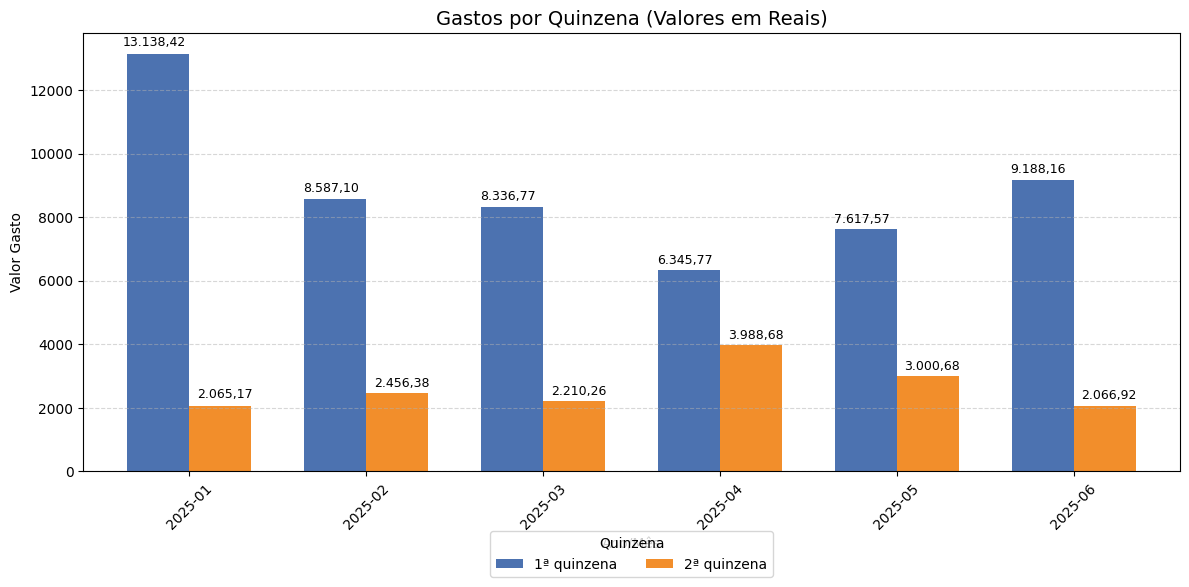

In [69]:
# Agrupar por ano_mes e quinzena
gastos_quinzena = (
    gastos_reais
    .groupby(["ano_mes", "quinzena"])["valor"]
    .sum()
    .reset_index()
)

# colocar quinzenas como colunas (pivotar dados)
gastos_quinzena_pivot = gastos_quinzena.pivot(index="ano_mes", columns="quinzena", values="valor").fillna(0)
gastos_quinzena_pivot.index = gastos_quinzena_pivot.index.astype(str)

# Cores customizadas para 1ª e 2ª quinzena
colors = ["#4c72b0", "#f28e2b"]
ax = gastos_quinzena_pivot.plot(kind="bar", figsize=(12, 6), width=0.7, color=colors)

plt.title("Gastos por Quinzena (Valores em Reais)", fontsize=14)
plt.xlabel("Ano/Mês")
plt.ylabel("Valor Gasto")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Quinzena", loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.tight_layout()

# Adiciona apenas os valores em reais (sem R$, sem negrito)
for i, (idx, row) in enumerate(gastos_quinzena_pivot.iterrows()):
    for j, valor in enumerate(row):
        texto = f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
        x = i + (j - 0.5) * 0.4
        y = valor + row.sum() * 0.01
        ax.text(x, y, texto, ha="center", va="bottom", fontsize=9)

plt.show()

In [70]:
# Calcula a média de valor gasto por quinzena
media_valor = gastos_quinzena.groupby("quinzena")["valor"].mean()

# Calcula o total das médias (soma das duas quinzenas)
total_media = media_valor.sum()

# Calcula o percentual que cada quinzena representa
percentual = (media_valor / total_media * 100).round(2)

# Combina os resultados em um DataFrame
resultado = pd.DataFrame({
    "media_valor": media_valor.round(2),
    "percentual": percentual
})

print(resultado)

             media_valor  percentual
quinzena                            
1ª quinzena      8868.96       77.12
2ª quinzena      2631.35       22.88


## Operações Pix: PF vs PJ

**Principais insights:**

* Em todos os meses analisados, exceto junho/2025, as transações de pix acontecem com maior incidência para pessoas físicas, conforme mostraremos a seguir. Pix para pessoas são predominantes não apenas em relação ao número de transações como também no volume de gastos, como mostramos a seguir.

In [71]:
# Filtrar apenas transações Pix
transacoes_pix = gastos_reais[
    gastos_reais["tipo_operacao"].str.contains("pix", case=False, na=False) &
    gastos_reais["tipo_pix"].isin(["pf", "pj"])
].copy()

In [72]:
print (transacoes_pix.groupby("tipo_pix").size())

tipo_pix
pf    89
pj    58
dtype: int64


In [80]:
print(transacoes_pix.groupby("tipo_pix")["valor"].sum())

tipo_pix
pf    16842.82
pj     6252.45
Name: valor, dtype: float64


In [73]:
# Contar PF vs PJ por mês
# Garante que temos a coluna ano_mes
#transacoes_pix["ano_mes"] = pd.to_datetime(transacoes_pix["data"]).dt.to_period("M").astype(str)

# Contagem por mês e tipo de pix (para PJ ou PF)
contagem_pix_mensal = transacoes_pix.groupby(["ano_mes", "tipo_pix"]).size().unstack(fill_value=0)
contagem_pix_mensal["total"] = contagem_pix_mensal.sum(axis=1)
contagem_pix_mensal["percent_pf"] = (contagem_pix_mensal["pf"] / contagem_pix_mensal["total"] * 100).round(2)
contagem_pix_mensal["percent_pj"] = (contagem_pix_mensal["pj"] / contagem_pix_mensal["total"] * 100).round(2)

print("Resumo da distribuição PF vs PJ (em %):")
print(contagem_pix_mensal[["percent_pf", "percent_pj"]])

Resumo da distribuição PF vs PJ (em %):
tipo_pix  percent_pf  percent_pj
ano_mes                         
2025-01        65.22       34.78
2025-02        89.47       10.53
2025-03        69.57       30.43
2025-04        55.00       45.00
2025-05        72.00       28.00
2025-06        32.43       67.57


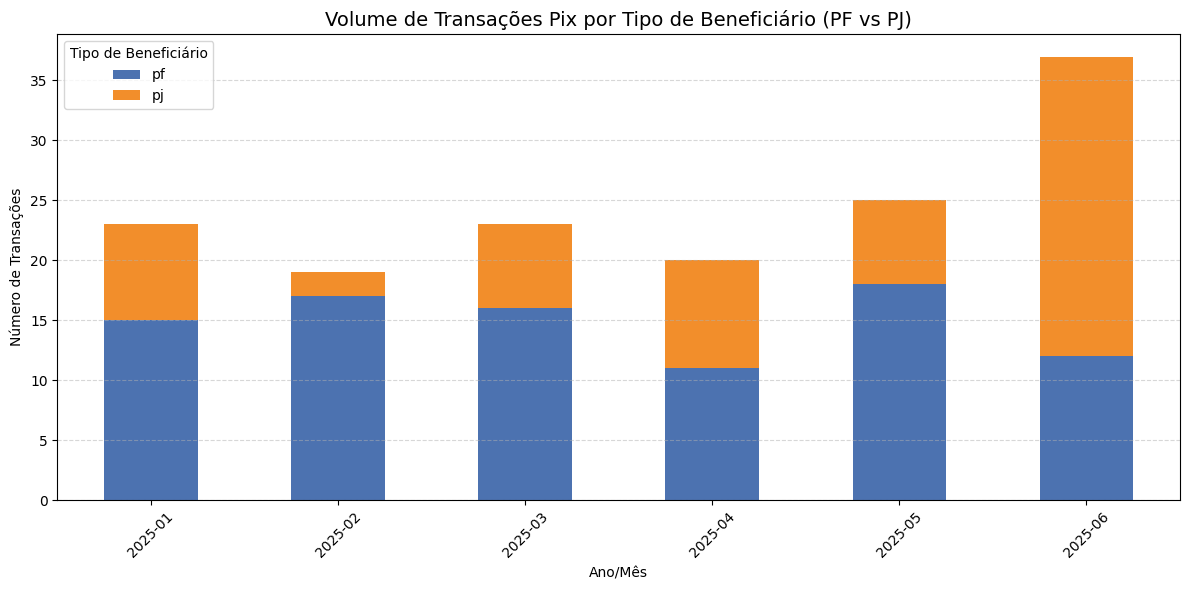

In [74]:
# visualização com gráfico de barras empilhada

# Gráfico de barras empilhadas
contagem_pix_mensal[["pf", "pj"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["#4c72b0", "#f28e2b"]
)

plt.title("Volume de Transações Pix por Tipo de Beneficiário (PF vs PJ)", fontsize=14)
plt.xlabel("Ano/Mês")
plt.ylabel("Número de Transações")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Beneficiário")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## Frequência por Dia da Semana

* Utilizou-se a coluna dia_da_semana extraída da data.

* Foi feita uma contagem de transações por dia da semana.

**Principais insights:**

* Terça e quarta-feira são os dias com maior número de saídas.

* Domingo é o dia com menor volume.

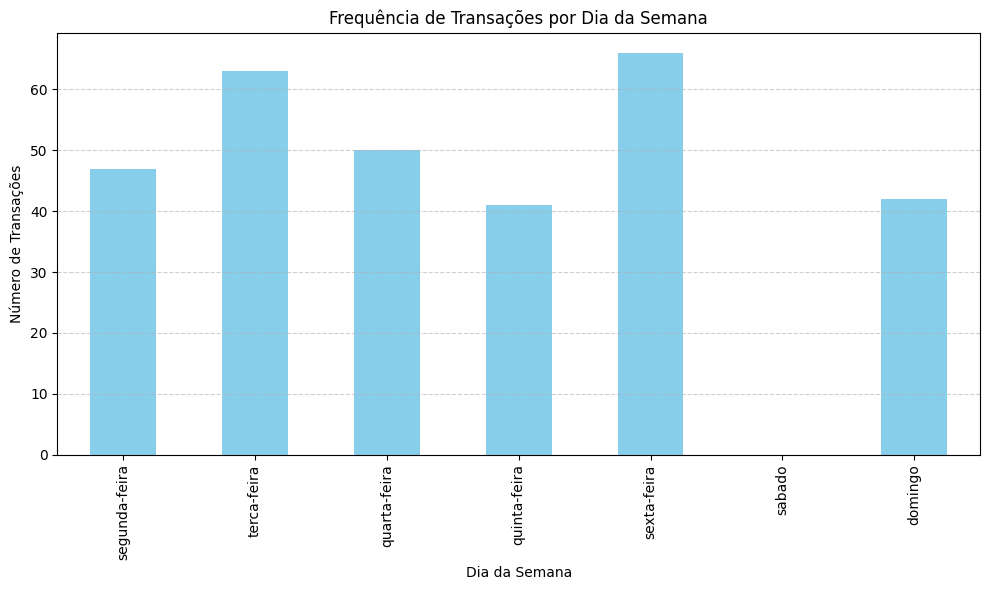

In [75]:
# Ordena os dias da semana corretamente
dias_ordenados = [
    "segunda-feira", "terca-feira", "quarta-feira",
    "quinta-feira", "sexta-feira", "sabado", "domingo"
]

# Conta a quantidade de transações por dia da semana
transacoes_por_dia = gastos_reais["dia_da_semana"].value_counts().reindex(dias_ordenados)

# Gera o gráfico de barras
plt.figure(figsize=(10, 6))
transacoes_por_dia.plot(kind='bar', color='skyblue')
plt.title("Frequência de Transações por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Transações")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Conclusão

As análises exploratórias permitiram validar todas as quatro hipóteses iniciais:

1. **O maior volume de saídas tem ocorrido por pagamento de boletos**.

2. **A primeira quinzena concentra mais saídas financeiras**.

3. **Operações Pix são mais comuns com pessoas físicas**.

4. **Dias úteis concentram a maioria das movimentações**, com destaque para terça e sexta-feira.

Esses resultados ajudam a entender o comportamento financeiro ao longo do semestre e abrem oportunidades para automatização de classificação de gastos, identificação de padrões e recomendações de economia.